In [1]:
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(512)
;

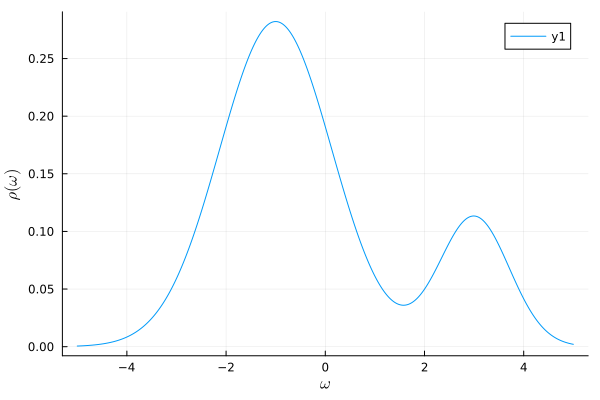

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.6) + 0.2*gaussian(omega, 3, 1)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     1.394068e-01     1.354674e+00
 * time: 0.03782320022583008
     1     1.271921e-01     8.719071e-01
 * time: 2.2706191539764404
     2     9.446336e-02     9.728176e-01
 * time: 2.7323989868164062
     3     4.352172e-02     1.124699e+00
 * time: 3.0723140239715576
     4     3.614140e-02     6.164562e-02
 * time: 3.381330966949463
     5     3.610852e-02     1.054229e-02
 * time: 3.878232002258301
     6     3.610750e-02     1.921777e-03
 * time: 4.273904085159302
     7     3.610748e-02     1.512958e-04
 * time: 4.631805181503296
     8     3.610748e-02     2.197711e-05
 * time: 5.040225982666016
     9     3.610748e-02     4.523937e-06
 * time: 5.354560136795044
    10     3.610748e-02     6.640354e-07
 * time: 5.814730167388916
    11     3.610748e-02     1.213906e-07
 * time: 6.318315029144287
    12     3.610748e-02     1.825283e-08
 * time: 6.682523965835571
    13     3.610748e-02     3.485925e-09
 *

In [8]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     3.610748e-02     3.485925e-09
 * time: 0.0002751350402832031
max_theta=0.0765681561878727784316709472257185720435162757526388722938845753649857794053974746298739235788829300383428656183190727654273406225392252374702495083245044387
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     3.610748e-02     4.607507e-01
 * time: 0.0003108978271484375
     1     3.458019e-02     3.832203e-01
 * time: 0.284390926361084
     2     2.842299e-02     3.094581e-01
 * time: 0.7662980556488037
     3     2.588584e-02     2.989854e-01
 * time: 1.0775980949401855
     4     1.616310e-02     6.775993e-01
 * time: 1.3787341117858887
     5     1.152500e-02     1.850161e-01
 * time: 1.6789920330047607
     6     1.100075e-02     6.844742e-02
 * time: 2.1308579444885254
     7     1.081305e-02     3.099662e-02
 * time: 2.567918062210083
     8     1.079639e-02     1.175092e-02
 * time: 3.007291078567505
     9     1.07

     0     4.326059e-04     1.758144e-02
 * time: 0.00045609474182128906
     1     4.302979e-04     2.036558e-02
 * time: 0.817634105682373
     2     4.259369e-04     1.363101e-02
 * time: 1.7921710014343262
     3     4.207914e-04     1.750596e-02
 * time: 3.0247199535369873
     4     4.149208e-04     1.973621e-02
 * time: 5.432557106018066
     5     4.068309e-04     1.920781e-02
 * time: 8.068131923675537
     6     3.904702e-04     1.711957e-02
 * time: 10.2062509059906
     7     3.622576e-04     2.465795e-02
 * time: 12.53148889541626
     8     3.541879e-04     1.202338e-02
 * time: 14.574924945831299
     9     3.317255e-04     1.335290e-02
 * time: 16.455143928527832
    10     2.745317e-04     3.095028e-02
 * time: 18.188753128051758
    11     2.227564e-04     1.468464e-02
 * time: 20.159323930740356
    12     2.109885e-04     1.550989e-02
 * time: 21.73609209060669
    13     1.980827e-04     7.102639e-03
 * time: 23.189187049865723
    14     1.965369e-04     5.610650e

    20     4.355850e-05     3.544771e-03
 * time: 23.511010885238647
    21     4.283155e-05     8.929579e-03
 * time: 24.620580911636353
    22     4.150436e-05     1.009261e-02
 * time: 25.576907873153687
    23     4.017304e-05     1.070078e-02
 * time: 26.619478940963745
    24     3.846031e-05     6.984470e-03
 * time: 27.81089997291565
    25     3.764900e-05     3.720964e-03
 * time: 28.877790927886963
    26     3.751465e-05     1.020167e-03
 * time: 29.542881965637207
    27     3.737960e-05     2.515373e-03
 * time: 30.670198917388916
    28     3.723503e-05     3.955188e-03
 * time: 31.906522035598755
    29     3.698031e-05     3.969317e-03
 * time: 33.017027854919434
    30     3.677679e-05     3.585829e-03
 * time: 34.09895205497742
    31     3.658214e-05     1.812335e-03
 * time: 35.15672993659973
    32     3.654232e-05     1.097643e-03
 * time: 36.321692943573
    33     3.653096e-05     2.957180e-04
 * time: 36.95482683181763
    34     3.652719e-05     2.805534e-04


LoadError: InterruptException:

In [9]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31


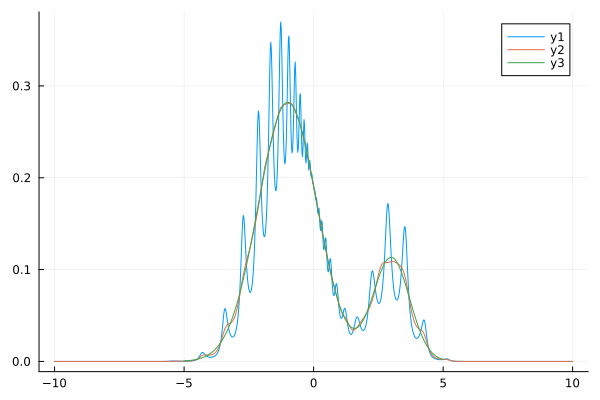

In [10]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

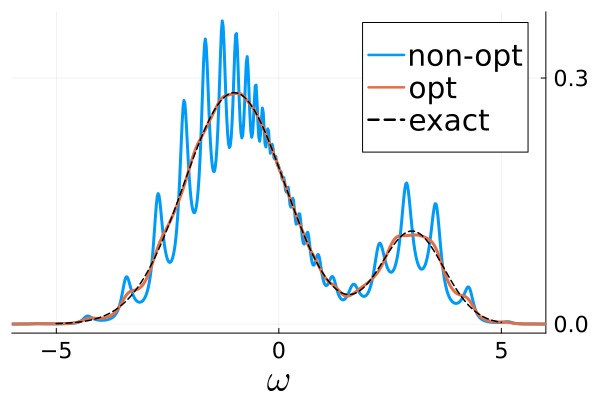

In [11]:
plot(xlim = [-6,6],
    legend = :topright,
    ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
#plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")